<a href="https://colab.research.google.com/github/athiagarajan/fintech/blob/main/Fintech1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


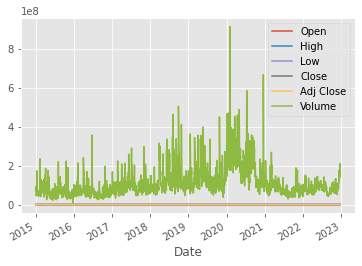

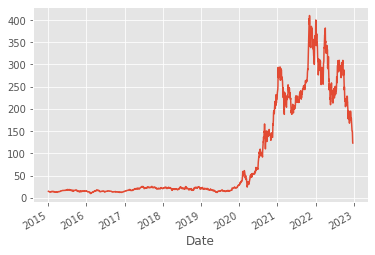

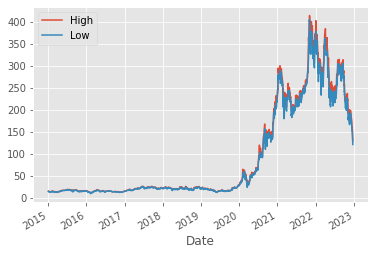

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000   
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500   
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500   
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000   
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500   

                100ma  
Date                   
2015-01-02  14.620667  
2015-01-05  14.313334  
2015-01-06  14.237333  
2015-01-07  14.193833  
2015-01-08  14.163333  


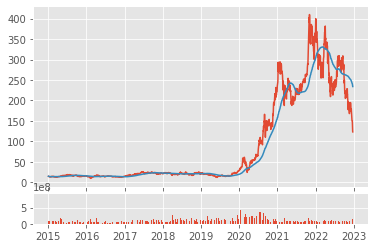

                 open       high        low      close
Date                                                  
2015-01-02  14.620667  14.620667  13.777333  13.777333
2015-01-12  13.480667  13.616667  12.791333  13.104667
2015-01-22  13.441333  13.770000  13.291333  13.573333
2015-02-01  14.062667  14.732667  14.062667  14.419333
2015-02-11  14.186667  14.474000  13.525333  14.474000


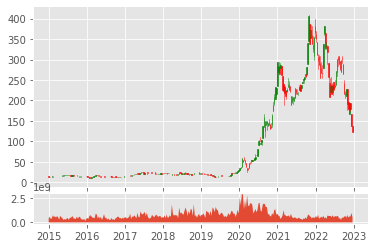

In [ ]:
#!pip install yfinance
#!pip install mpl-finance
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = pdr.get_data_yahoo("TSLA", start, end)
#df = web.DataReader("TSLA", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
#df = df.drop("Symbol", axis=1)



df.to_csv('TSLA.csv')
df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
print(df.head())

df.plot()
plt.show()

df['Adj Close'].plot()
plt.show()
df[['High','Low']].plot()
plt.show()

df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()